Spectral Rolloff定义为频谱中低于该频率的能量达到总能量的某个特定百分比（通常为85%或95%）的频率点。这个特征可以用来描述频谱的形状和能量分布。Spectral Rolloff可以作为船舶音频分类的有效特征之一，特别是当与其他频域特征（如频谱质心、频带能量比等）结合使用时，能够更全面地描述船舶音频的特性，提高分类准确率。

In [22]:
import librosa
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

In [2]:
# 音频文件路径
audio_file = r'E:\数据集\ShipEar\data_preprocessing\3_Frame_Windows_2s_50%\6__10_07_13_marDeCangas_Entra_18.wav'

waveform, sample_rate = librosa.load(audio_file, sr=16000)

frame_length = 2048
hop_length = 512

In [18]:
# 计算默认的滚降点（85%能量）
rolloff = librosa.feature.spectral_rolloff(y=waveform, sr=sample_rate, hop_length=hop_length, n_fft=frame_length)

# 计算最大的滚降点（99%能量）
rolloff_max = librosa.feature.spectral_rolloff(y=waveform, sr=sample_rate, hop_length=hop_length, n_fft=frame_length, roll_percent=0.99)

# 计算接近最小频率的滚降点（1%能量）
rolloff_min = librosa.feature.spectral_rolloff(y=waveform, sr=sample_rate, hop_length=hop_length, n_fft=frame_length, roll_percent=0.01)

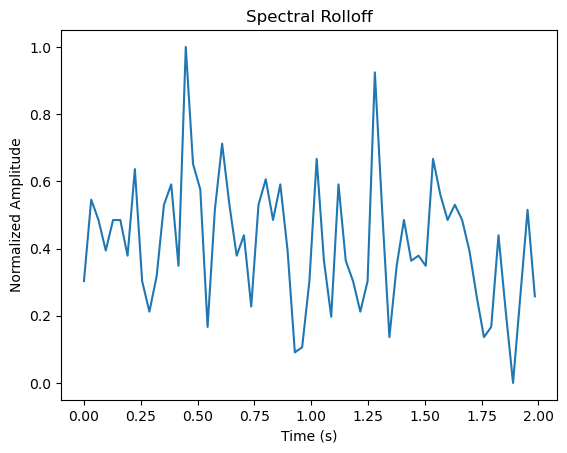

In [27]:
frame = range(rolloff.shape[1]) 
t = librosa.frames_to_time(frame, sr=sample_rate, hop_length=hop_length)
plt.plot(t, minmax_scale(rolloff[0], axis=0))
# plt.plot(t, minmax_scale(rolloff_max[0], axis=0), c='r')
# plt.plot(t, minmax_scale(rolloff_min[0], axis=0), c='g')
plt.title('Spectral Rolloff')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Amplitude')
plt.show()